In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df_hsegm = pd.read_csv("dataset/hsegm.csv", header=0)
df_hsegm.head(10)

# divimimos las características de la clase
X, y = df_hsegm.iloc[:, :7], df_hsegm.iloc[:, -1]

#divimos los datos de entranamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# estandarizamos los datos

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [4]:
%matplotlib inline
from CSBS import SBS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)

sbs.fit(X_train_std, y_train)

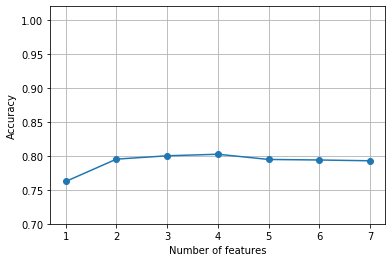

In [5]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid(True)
plt.show()

In [7]:
k3 = list(sbs.subsets_[4])
print(df_hsegm.columns[1:][k3])


Index(['v', 'b', 'r'], dtype='object')
